In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv(r'/content/kepler_data_data.csv')

# EDA
print(df.info())
null = df.isnull().sum()
print(null)
# print(df['koi_disposition'].value_counts())

# # Preprocessing
# df.dropna(inplace=True)
# label_encoder = LabelEncoder()
# df['koi_disposition'] = label_encoder.fit_transform(df['koi_disposition'])
# X = df.drop('koi_disposition', axis=1)
# y = df['koi_disposition']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Model selection and training
# model = RandomForestClassifier()
# model.fit(X_train, y_train)

# # Evaluation
# y_pred = model.predict(X_test)
# print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))

# # Feature importance
# importance = model.feature_importances_
# print("Feature importance:", importance)

# # Save the model
# import joblib
# joblib.dump(model, 'kepler_model.pkl')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              9564 non-null   int64  
 1   kepoi_name         9564 non-null   object 
 2   kepler_name        2360 non-null   object 
 3   koi_disposition    9564 non-null   object 
 4   koi_pdisposition   9564 non-null   object 
 5   koi_score          8054 non-null   float64
 6   koi_fpflag_nt      9564 non-null   int64  
 7   koi_fpflag_ss      9564 non-null   int64  
 8   koi_fpflag_co      9564 non-null   int64  
 9   koi_fpflag_ec      9564 non-null   int64  
 10  koi_period         9564 non-null   float64
 11  koi_period_err1    9110 non-null   float64
 12  koi_period_err2    9110 non-null   float64
 13  koi_time0bk        9564 non-null   float64
 14  koi_time0bk_err1   9110 non-null   float64
 15  koi_time0bk_err2   9110 non-null   float64
 16  koi_impact         9201 

In [ ]:
df.shape

(9564, 49)

In [ ]:

df.isnull().sum()
# Fill all missing values (NaNs) in the DataFrame with 1
df_filled = df.fillna(1)

# Check if the missing values are filled
print(df_filled.isnull().sum())



kepid                0
kepoi_name           0
kepler_name          0
koi_disposition      0
koi_pdisposition     0
koi_score            0
koi_fpflag_nt        0
koi_fpflag_ss        0
koi_fpflag_co        0
koi_fpflag_ec        0
koi_period           0
koi_period_err1      0
koi_period_err2      0
koi_time0bk          0
koi_time0bk_err1     0
koi_time0bk_err2     0
koi_impact           0
koi_impact_err1      0
koi_impact_err2      0
koi_duration         0
koi_duration_err1    0
koi_duration_err2    0
koi_depth            0
koi_depth_err1       0
koi_depth_err2       0
koi_prad             0
koi_prad_err1        0
koi_prad_err2        0
koi_teq              0
koi_teq_err1         0
koi_teq_err2         0
koi_insol            0
koi_insol_err1       0
koi_insol_err2       0
koi_model_snr        0
koi_tce_plnt_num     0
koi_tce_delivname    0
koi_steff            0
koi_steff_err1       0
koi_steff_err2       0
koi_slogg            0
koi_slogg_err1       0
koi_slogg_err2       0
koi_srad   

In [ ]:
import pandas as pd

# Assuming df is your DataFrame
# Make sure to only include numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Function to find and remove outliers based on IQR
def remove_outliers(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_filtered

# Apply the outlier removal function to each numeric column
df_cleaned = df.copy()  # Make a copy to avoid modifying the original DataFrame
for column in numeric_columns:
    df_cleaned = remove_outliers(df_cleaned, column)

# Verify the shape of the DataFrame before and after removing outliers
print(f"Original shape: {df.shape}")
print(f"Cleaned shape: {df_cleaned.shape}")


Original shape: (9564, 49)
Cleaned shape: (0, 49)


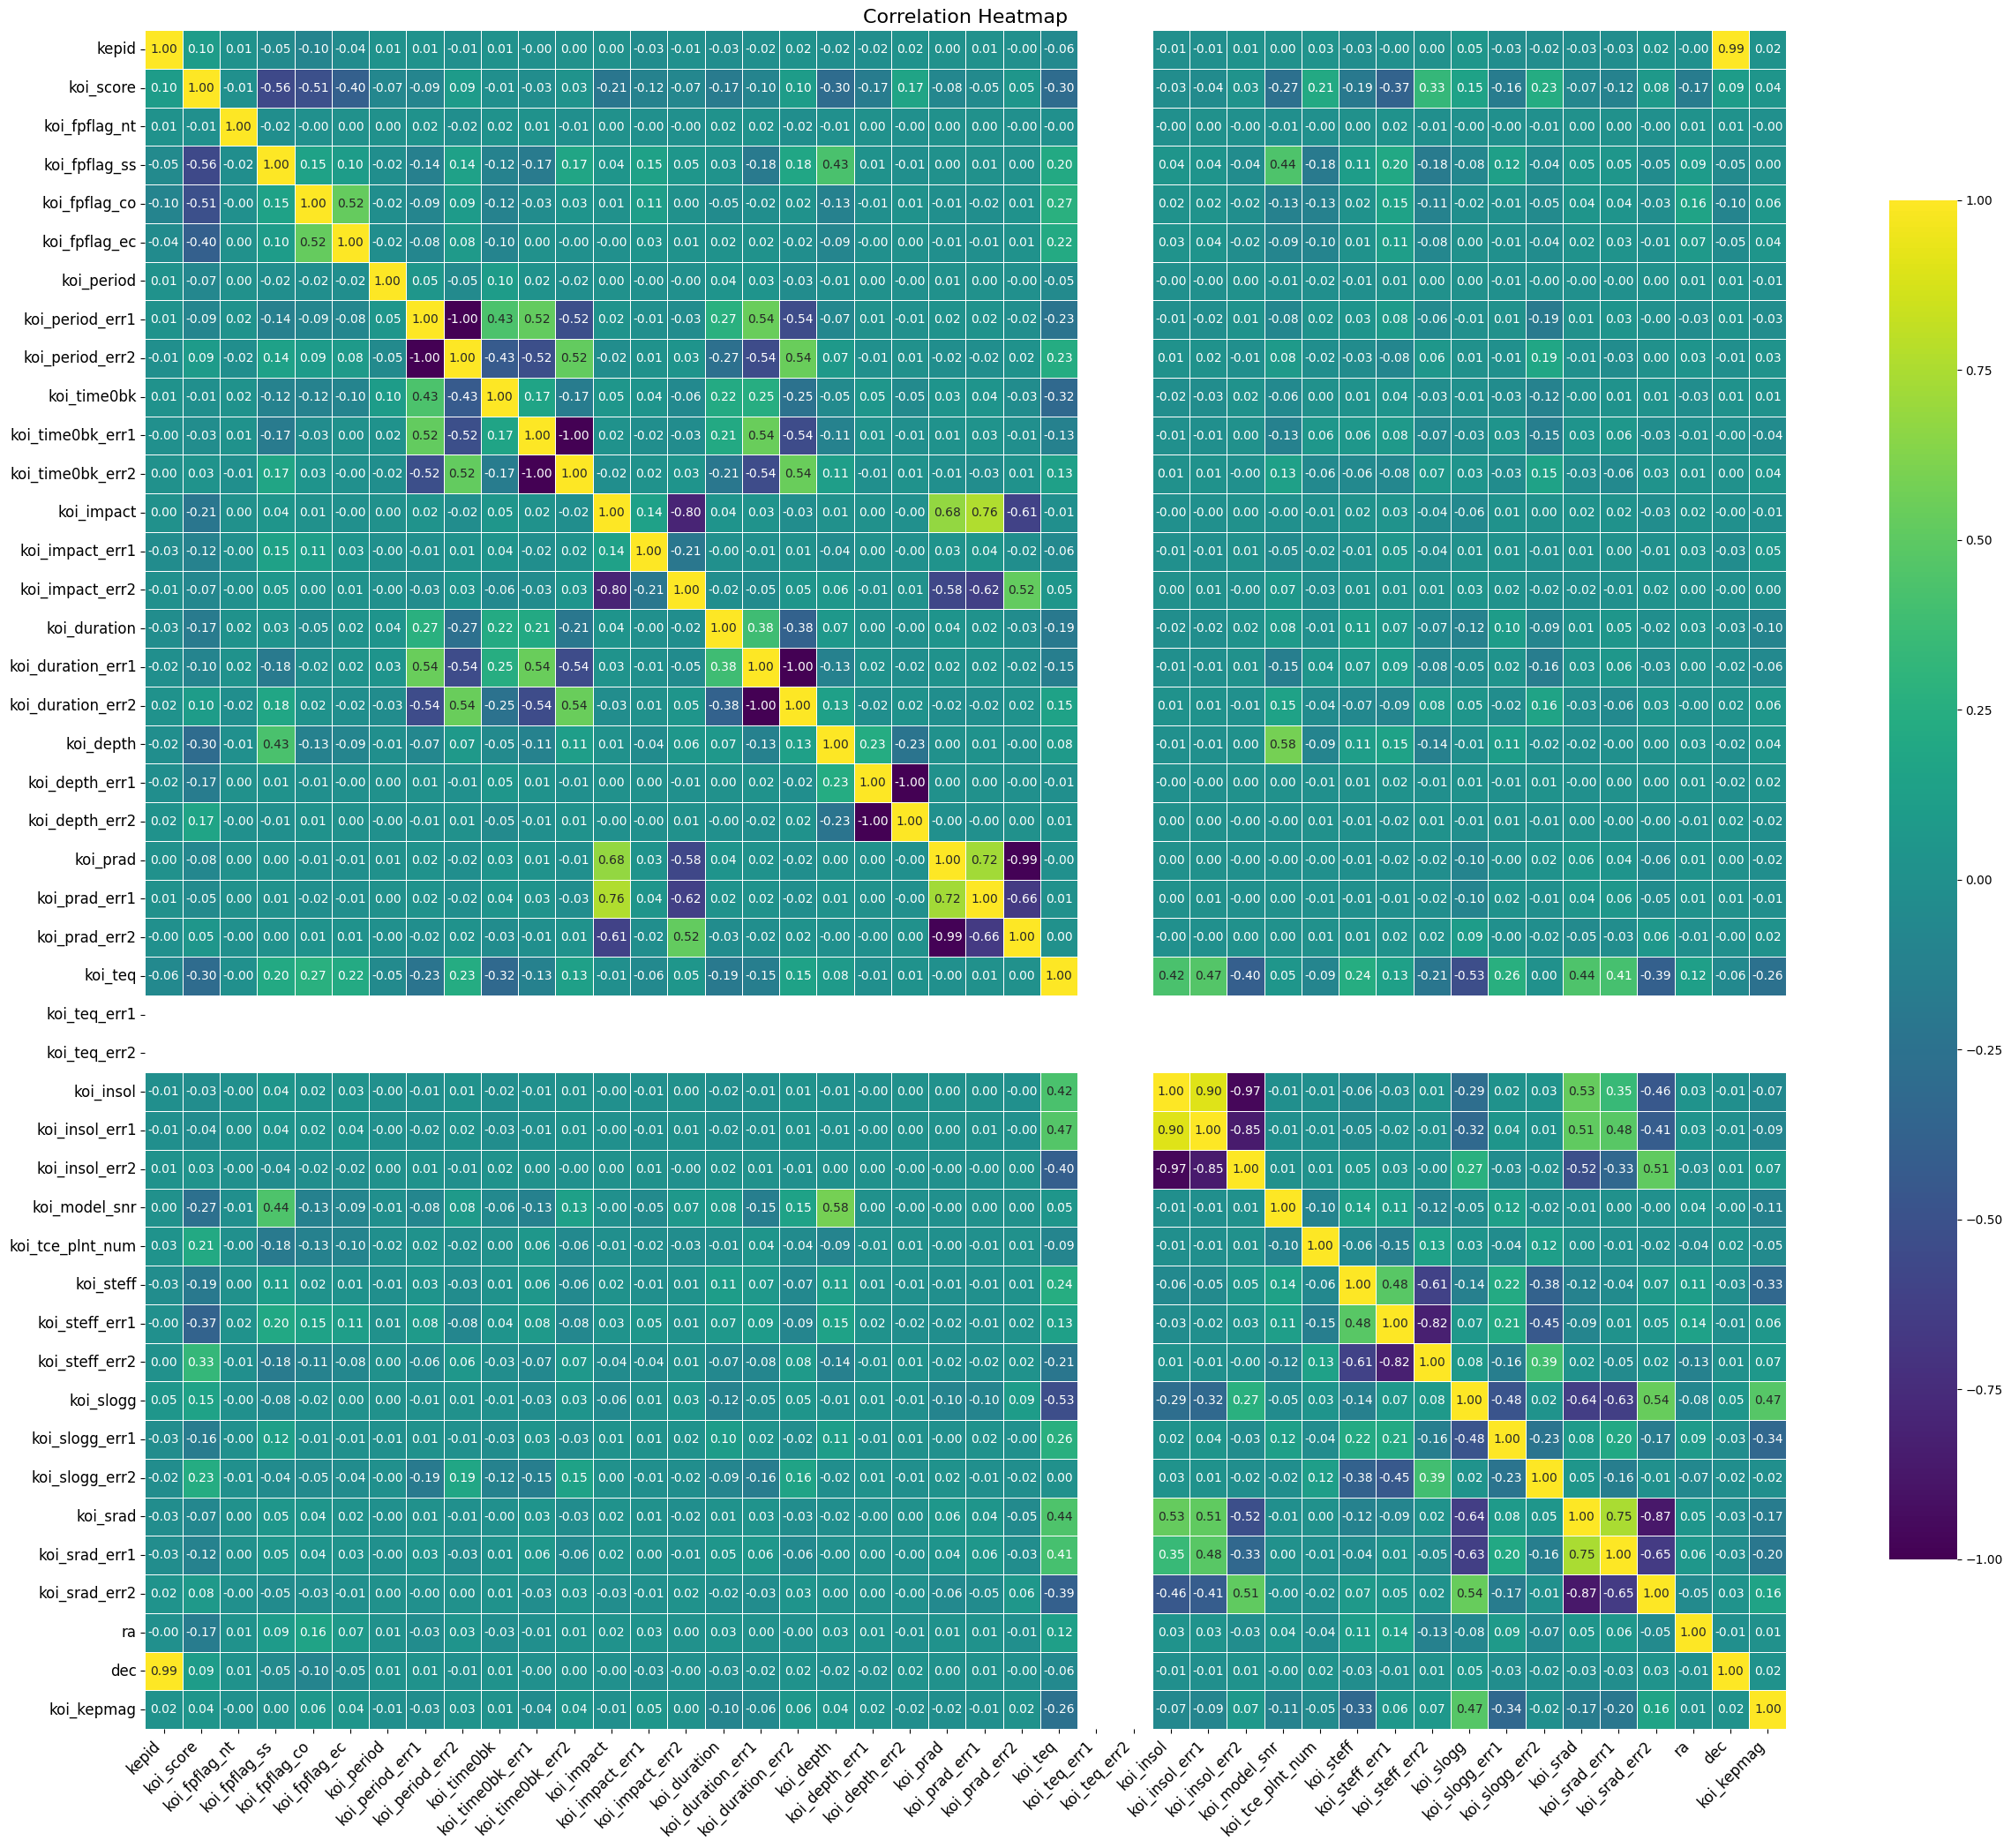

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix for numeric columns
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

# Plotting the heatmap with improved clarity
plt.figure(figsize=(30, 25))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="viridis",   # Use a color map with good contrast
    linewidths=0.5,
    annot_kws={"size": 10},  # Adjust the size of annotations
    cbar_kws={"shrink": 0.8},  # Shrink the color bar
)

plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels
plt.yticks(fontsize=12)  # Adjust y-axis labels font size
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


In [ ]:
df=df.drop(columns=['kepoi_name'])
df=df.drop(columns=['kepler_name'])
#df=df.drop(columns=['koi_teq_err1'])
#df=df.drop(columns=['koi_teq_err2'])

In [ ]:
df.columns
#df = df.drop(columns=['kepoi_name'])

df = df.drop(columns=['koi_pdisposition'])


In [ ]:
df.columns

Index(['kepid', 'koi_disposition', 'koi_score', 'koi_fpflag_nt',
       'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period',
       'koi_period_err1', 'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_insol', 'koi_insol_err1',
       'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

**USING RANDOM FOREST WITHOUT HYPERPARAMTERS**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Fill missing values with a placeholder
df = df.fillna(1)

# Encode categorical target variable 'koi_disposition'
label_encoder = LabelEncoder()
df['koi_disposition_encoded'] = label_encoder.fit_transform(df['koi_disposition'].astype(str))

# Separate features and target variable
X = df.drop(columns=['koi_disposition', 'koi_disposition_encoded'])
y = df['koi_disposition_encoded']

# Identify categorical and numeric columns
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Convert categorical columns to strings to ensure consistent data types
for col in categorical_columns:
    X[col] = X[col].astype(str)

# Define preprocessor with one-hot encoding for categorical features and scaling for numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
        ('num', StandardScaler(), numeric_columns)
    ],
    remainder='passthrough'
)

# Create a pipeline that first transforms data and then fits the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.90
Confusion Matrix:
[[368  91  25]
 [ 68 416   6]
 [  9   1 929]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79       484
           1       0.82      0.85      0.83       490
           2       0.97      0.99      0.98       939

    accuracy                           0.90      1913
   macro avg       0.87      0.87      0.87      1913
weighted avg       0.89      0.90      0.89      1913



**Random forest after using HYPERPARAMETER**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [ ]:
# Load the dataset (assuming df is already loaded)
# Convert all columns to string type to ensure consistency for OneHotEncoder
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()  # Adjusted to ensure categorical_columns is defined before use
df[categorical_columns] = df[categorical_columns].astype(str)


In [ ]:
# Encode categorical target variable 'koi_disposition'
label_encoder = LabelEncoder()
df['koi_disposition_encoded'] = label_encoder.fit_transform(df['koi_disposition'])


In [ ]:
# Separate features and target variable
X = df.drop(columns=['koi_disposition', 'koi_disposition_encoded'])
y = df['koi_disposition_encoded']


In [ ]:
# Identify categorical and numeric columns
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Define preprocessor with imputation, one-hot encoding for categorical features and scaling for numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_columns),
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_columns)
    ]
)


In [ ]:
# Create a pipeline that first transforms data and then fits the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define the hyperparameters to tune
param_grid = {
    'classifier__n_estimators': [300],           # Number of trees
    'classifier__max_depth': [12],               # Maximum depth of trees
    'classifier__min_samples_split': [5],        # Minimum number of samples required to split a node
    'classifier__min_samples_leaf': [4],         # Minimum number of samples required to be at a leaf node
    'classifier__bootstrap': [True, False]       # Whether bootstrap samples are used when building trees
}


In [ ]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Train the model using grid search
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [ ]:
# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Best Parameters: {'classifier__bootstrap': False, 'classifier__max_depth': 12, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 300}
Accuracy: 0.90
Confusion Matrix:
[[ 544  146   39]
 [  91  625    4]
 [  11    2 1408]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.75      0.79       729
           1       0.81      0.87      0.84       720
           2       0.97      0.99      0.98      1421

    accuracy                           0.90      2870
   macro avg       0.87      0.87      0.87      2870
weighted avg       0.90      0.90      0.90      2870



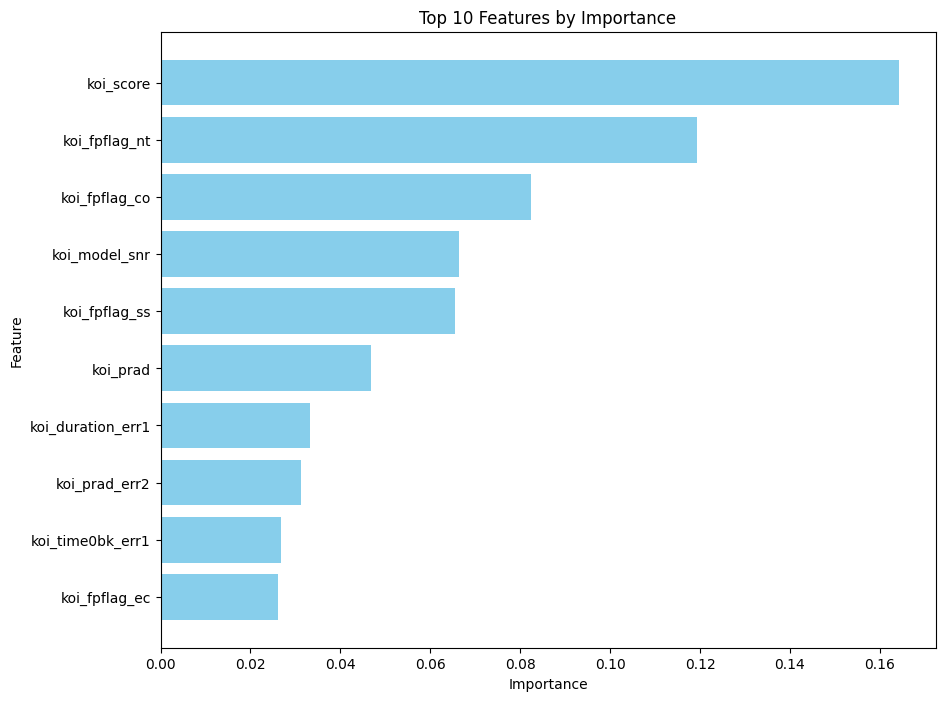

In [ ]:
importances = best_model.named_steps['classifier'].feature_importances_

# Get feature names from the preprocessor
encoder = best_model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
encoded_feature_names = encoder.get_feature_names_out(categorical_columns)
all_feature_names = np.append(encoded_feature_names, numeric_columns)

# Create a DataFrame with features and their importance
feature_importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top features
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'].head(10), feature_importance_df['Importance'].head(10), color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Features by Importance')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()